In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(train_X,train_Y),(test_X,test_Y)=tf.keras.datasets.cifar10.load_data()

In [3]:
train_X.shape

(50000, 32, 32, 3)

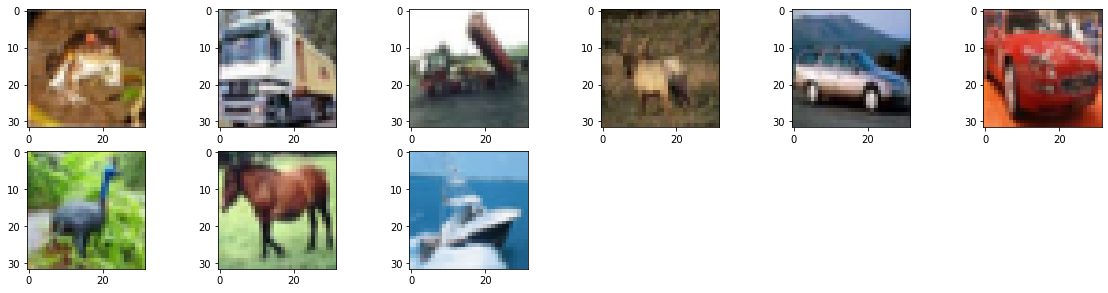

In [4]:
n=9
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(460+1+i)
    plt.imshow(train_X[i])
plt.show()

In [5]:
#pre-processing
train_X=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

In [6]:
train_X.shape

(50000, 32, 32, 3)

In [7]:
from keras.utils import np_utils
#One-hot-Coding for output
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

In [8]:
test_Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [9]:
num_classes

10

In [10]:
train_X.shape[1:]

(32, 32, 3)

In [11]:
#build CNN model
model=keras.Sequential()
model.add(keras.layers.Input(train_X.shape[1:]))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters=32, kernel_size=1, strides=1, activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation="relu"))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        1056      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 15, 15, 32)       128       
 hNormalization)                                                 
                                                        

In [12]:
model.compile(loss="categorical_crossentropy", 
              optimizer=tf.keras.optimizers.SGD(learning_rate = 0.01 , momentum = 0.9), 
              metrics=["accuracy"])

In [13]:
model.fit(train_X,train_Y,
    validation_split = 0.1,shuffle = True,
    epochs=10,batch_size=32)

Epoch 1/10
1407/1407 [==============================] - 118s 83ms/step - loss: 1.4887 - accuracy: 0.4880 - val_loss: 1.3851 - val_accuracy: 0.5322
Epoch 2/10
1407/1407 [==============================] - 118s 84ms/step - loss: 1.1164 - accuracy: 0.6084 - val_loss: 1.2287 - val_accuracy: 0.5580
Epoch 3/10
1407/1407 [==============================] - 122s 87ms/step - loss: 0.9330 - accuracy: 0.6753 - val_loss: 1.1795 - val_accuracy: 0.5984
Epoch 4/10
1407/1407 [==============================] - 122s 87ms/step - loss: 0.7722 - accuracy: 0.7311 - val_loss: 0.9974 - val_accuracy: 0.6602
Epoch 5/10
1407/1407 [==============================] - 119s 85ms/step - loss: 0.6312 - accuracy: 0.7816 - val_loss: 1.2107 - val_accuracy: 0.6260
Epoch 6/10
1407/1407 [==============================] - 128s 91ms/step - loss: 0.5194 - accuracy: 0.8207 - val_loss: 1.2778 - val_accuracy: 0.6190
Epoch 7/10
1407/1407 [==============================] - 122s 87ms/step - loss: 0.4197 - accuracy: 0.8548 - val_loss: 1

In [14]:
model.evaluate(test_X,test_Y)

313/313 [==============================] - 6s 20ms/step - loss: 1.5631 - accuracy: 0.6423


[1.563078761100769, 0.642300009727478]